# Tweet Analysis 

Given a tweets dataset, perform EDA and find:
 >Common emotions/words used by males and females <br>
 >The gender that makes more typos than the other

<b> Exploratory Data Analysis || Data Cleaning || Data Visualization || Feature selection and Feature Engineering </b>


#### Summary of Answers: <br>
>    Common words used by males: get, one, new , go, good <br>
     Common words used by females: like, one, day, time, people <br> 
     Gender that makes more typos - Female

 

In [1]:
#Importing libraries

import pandas as pd
import numpy as np

In [2]:
#Reading csv

df=pd.read_csv("Information.csv", encoding = "ISO-8859-1", index_col=0)
df.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _golden                20050 non-null  bool   
 1   _unit_state            20050 non-null  object 
 2   _trusted_judgments     20050 non-null  int64  
 3   _last_judgment_at      20000 non-null  object 
 4   gender                 19953 non-null  object 
 5   gender:confidence      20024 non-null  float64
 6   profile_yn             20050 non-null  object 
 7   profile_yn:confidence  20050 non-null  float64
 8   created                20050 non-null  object 
 9   description            16306 non-null  object 
 10  fav_number             20050 non-null  int64  
 11  gender_gold            50 non-null     object 
 12  link_color             20050 non-null  object 
 13  name                   20050 non-null  object 
 14  profile_yn_gold        50 non-null     obj

##### Correlation Matrix using heatmap

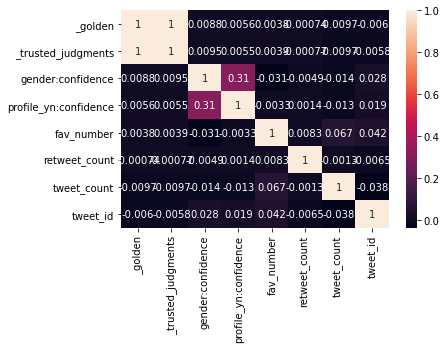

In [4]:
import seaborn as sb
sb.heatmap(df.corr(), annot=True)

### What are the common words/emotions expressed by each gender?

For this question, I've removed rows containing text values other than 'male' or 'female'.
#### *Approach:* <br>
1. Fetch Columns of interest
2. Clean data of unwanted values
3. Change index to "gender"
4. Subset rows with "males" and later "females" 
5. Initialize count vectorizer to count number of words (limit stopwords and strings such as http...)
6. Compute IDF values. Common words have lower IDF

##### *To check common words, we need gender as well as text column*

In [5]:
#Step 1: Fetch Columns of interest
 
df1=df[["text", "gender" ]] 

#Step 2: Clean data of unwanted values

df1['gender'].replace('brand', np.nan, inplace=True) #replaces with np.nan
df1['gender'].replace('unknown', np.nan, inplace=True) #replaces with np.nan
df1=df1.dropna()
df1.head()

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,text,gender
_unit_id,,
815719226,Robbie E Responds To Critics After Win Against...,male
815719227,ÛÏIt felt like they were my friends and I was...,male
815719228,i absolutely adore when louis starts the songs...,male
815719229,Hi @JordanSpieth - Looking at the url - do you...,male
815719230,Watching Neighbours on Sky+ catching up with t...,female


#### Part 1: To find the common words used by MALES

In [6]:
#Step 3: Change index to "gender"

#First, we change the index to "gender" and assign it to another dataframe called "df2"
#New dataframe is assigned because we need df1 again to answer the second part of this question
df2=df1.set_index("gender")

#Step 4. Subset rows with "males" and later "females" 

#We subset only those "male" rows
dfm=df2.loc[["male"],["text"]]
dfm.head()

,text
gender,
male,Robbie E Responds To Critics After Win Against...
male,ÛÏIt felt like they were my friends and I was...
male,i absolutely adore when louis starts the songs...
male,Hi @JordanSpieth - Looking at the url - do you...
male,Gala Bingo clubs bought for å£241m: The UK's l...


In [7]:
#Step 5. Initialize count vectorizer to count number of words (limit stopwords and strings such as http...)

#Importing stopwords

from nltk.corpus import stopwords
list_of_stopwords=list(stopwords.words('english')) #To filter out stopwords from 'text'

from sklearn.feature_extraction.text import TfidfTransformer 
#TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents #For reference
from sklearn.feature_extraction.text import CountVectorizer
#to convert text to a matrix and counts the occurence
cv = CountVectorizer(stop_words=["https", "co", "_ù", 'i',
"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])
listoftext=list(dfm['text'])

#counts every word in listoftext
word_count_vector=cv.fit_transform(listoftext) 

#compute tf-df--> commonly used words have lower score/ weight
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector) 

#store the values in a new dataframe dfm_idf
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

#sort the values in ascending order, since commonly used words have lessweight
df_idf1=df_idf.sort_values(by=['idf_weights'], ascending= True)
print("Top 25 most commonly used words used by males: ",df_idf1.head(25))

Top 25 most commonly used words used by males:          idf_weights
get        3.932405
like       3.947673
one        4.202069
time       4.328820
new        4.370206
love       4.423230
go         4.428193
people     4.500389
good       4.538541
day        4.544112
know       4.544112
see        4.631631
re         4.662594
û_         4.668903
got        4.675252
think      4.688073
back       4.707617
best       4.734286
would      4.747891
make       4.747891
last       4.761684
still      4.797024
amp        4.818843
need       4.841149
ll         4.848696


#### Part 2: To find the common words used by FEMALES <br> 
Using similar method 

In [8]:
#We subset only those "female" rows
dff=df2.loc[["female"],["text"]] #We subset only those "female" rows
cv = CountVectorizer(stop_words=["https", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now""https", "co", "_ù",])

#make a list from dff, of text values
listoftext=list(dff['text'])

#count vectorize the list
word_count_vector=cv.fit_transform(listoftext) 

#tf-idf transform
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector) 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

#sort the values in ascending order, since commonly used words have lessweight
df_idf2=df_idf.sort_values(by=['idf_weights'], ascending= True)
print("Top 25 most commonly used words used by females: ",df_idf2.head(25))

Top 25 most commonly used words used by females:          idf_weights
like       3.791419
get        4.001870
one        4.060619
love       4.079912
day        4.140131
go         4.237858
time       4.346180
now        4.376290
people     4.402840
re         4.487002
know       4.496806
new        4.511695
û_         4.526808
ve         4.578903
want       4.584265
best       4.584265
got        4.600526
amp        4.611515
last       4.617055
back       4.668348
see        4.722416
good       4.728608
make       4.734838
still      4.734838
need       4.779574


###  Data Visualization using plots

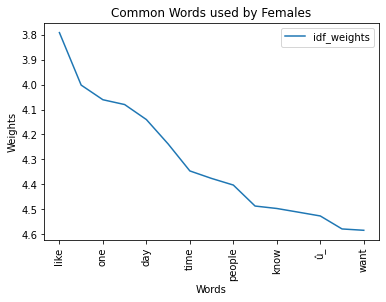

In [9]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

df_idf2.iloc[0:15].plot()
plt.title("Common Words used by Females")
plt.xlabel("Words")
plt.ylabel("Weights")
plt.xticks(rotation=90)


plt.gca().invert_yaxis()



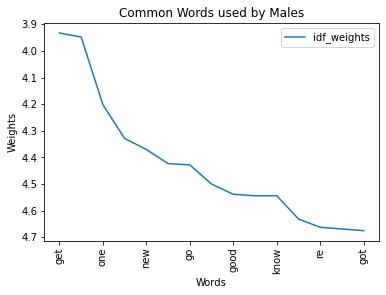

In [10]:
df_idf1.iloc[0:15].plot()
plt.title("Common Words used by Males")
plt.xlabel("Words")
plt.ylabel("Weights")
plt.xticks(rotation=90)

plt.gca().invert_yaxis()


### Which gender makes more typos?


We work with df1, which is the dataframe we get when we follow untill step 2.
#### *Approach:* <br>
1. Fetch Columns of interest
2. Clean data of unwanted values
3. Import libraries with correct spellings
4. Analyse each row for typos
5. If there is a typo, add 1 to a empty variable (str type), if no typo, add a 0
6. Append the variable to an empty list, 0s and 1s separated by a comma
7. Add the list to the dataframe as a new column

In [11]:
from nltk.corpus import names

from nltk.corpus import stopwords
list_of_stopwords=list(stopwords.words('english'))

from nltk.corpus import brown 
brownlist = brown.words()
word_set = set(brownlist)

from nltk.tokenize import word_tokenize

In [12]:
typos=[]
for i in range(df1.shape[0]):
    current_text=df['text'].values[i]
    tokenized_words=word_tokenize(current_text)
    
    tokenized_words = [word for word in tokenized_words if word.isalpha()]
    
    
    
    clean_words=''
    for word in tokenized_words:
        
        if word not in set(names.words()) not in set(list_of_stopwords) and word.startswith("//")==False and word.startswith("https")==False and word not in word_set and word.startswith("#")==False and word.startswith("@")==False:
            clean_words = 1
        else:
            clean_words= 0
    typos.append(clean_words)


In [13]:
df1["typos"]=typos
df1.head()

,text,gender,typos
_unit_id,,,
815719226,Robbie E Responds To Critics After Win Against...,male,0
815719227,ÛÏIt felt like they were my friends and I was...,male,0
815719228,i absolutely adore when louis starts the songs...,male,0
815719229,Hi @JordanSpieth - Looking at the url - do you...,male,0
815719230,Watching Neighbours on Sky+ catching up with t...,female,1


In [14]:
df1['typos'].replace('', 0, inplace=True)
##2 blank values were manually checked and changed to 0 (ie no typo)

#Shows number of typos by gender
df1.groupby('gender')["typos"].sum() 

gender
female    1244
male      1192
Name: typos, dtype: int64

#### Data Visualization

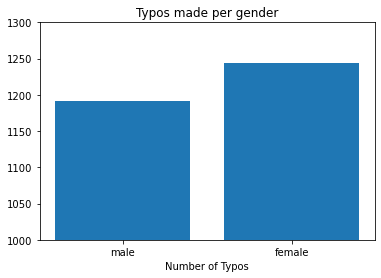

In [16]:
x=["male", "female"]
y=[1192, 1244]

#Setting y limits for better visualization
plt.ylim(1000,1300) 

plt.bar(x,y)


plt.xlabel("Number of Typos")
plt.title("Typos made per gender")
plt.show()

#####  Based on graphs, the gender that it more likely to make typos is - Female